# 參數優化 - 將歷史報酬提升數倍的方式！

這個單元中，我們首先要來撰寫一個獲利的策略

寫一個策略，首先要來將我們之前爬到的數據拿出來

## 拿出歷史大盤數據

In [1]:
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from finlab.data import Data

In [2]:
data = Data()
twii = data.get('發行量加權股價指數')
twii = twii[(twii.index.second == 0)]['台股指數']

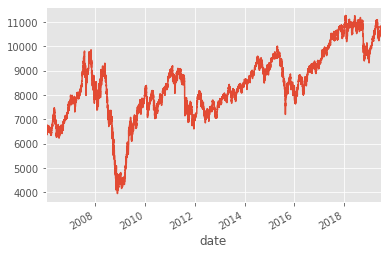

In [3]:
twii.plot()

[1.01336626 1.01351435 1.01365189 ... 1.01215354 1.01215112 1.01215452]


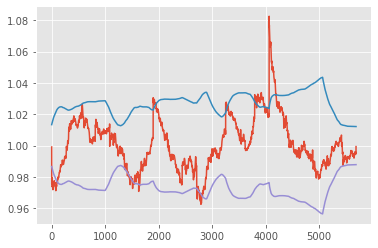

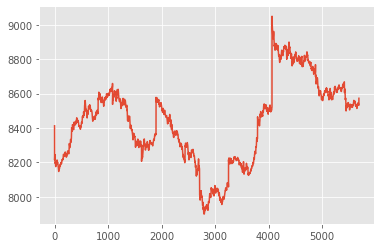

In [4]:
# 每500分鐘為一平均
sma = twii.rolling(500).mean()
# print(sma)

# 乖離率
bias = twii / sma
# print(bias)

# print(bias.rolling(1000).std())
ub = 1 + bias.rolling(1000).std() * 2
print(ub['2008-03'].values)

lb = 1 - bias.rolling(1000).std() * 2
# print(lb)

plt.plot(bias['2008-03'].values)
plt.plot(ub['2008-03'].values)
plt.plot(lb['2008-03'].values)
plt.show()
plt.plot(twii['2008-03'].values)

## 乖離率策略

buy date
2006-01-02 09:00:00   NaN
2006-01-02 09:01:00   NaN
2006-01-02 09:02:00   NaN
2006-01-02 09:03:00   NaN
2006-01-02 09:04:00   NaN
2006-01-02 09:05:00   NaN
2006-01-02 09:06:00   NaN
2006-01-02 09:07:00   NaN
2006-01-02 09:08:00   NaN
2006-01-02 09:09:00   NaN
2006-01-02 09:10:00   NaN
2006-01-02 09:11:00   NaN
2006-01-02 09:12:00   NaN
2006-01-02 09:13:00   NaN
2006-01-02 09:14:00   NaN
2006-01-02 09:15:00   NaN
2006-01-02 09:16:00   NaN
2006-01-02 09:17:00   NaN
2006-01-02 09:18:00   NaN
2006-01-02 09:19:00   NaN
2006-01-02 09:20:00   NaN
2006-01-02 09:21:00   NaN
2006-01-02 09:22:00   NaN
2006-01-02 09:23:00   NaN
2006-01-02 09:24:00   NaN
2006-01-02 09:25:00   NaN
2006-01-02 09:26:00   NaN
2006-01-02 09:27:00   NaN
2006-01-02 09:28:00   NaN
2006-01-02 09:29:00   NaN
                       ..
2019-06-21 13:01:00   NaN
2019-06-21 13:02:00   NaN
2019-06-21 13:03:00   NaN
2019-06-21 13:04:00   NaN
2019-06-21 13:05:00   NaN
2019-06-21 13:06:00   NaN
2019-06-21 13:07:00   NaN
201

2594.3900000000076

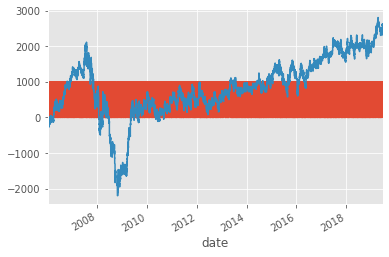

In [12]:
# ==== 乖離率策略
def strategy(m1=500, m2=1000, m3=1, m4=1, draw_plot=False):
    # 均線 每500分鐘
    sma = twii.rolling(m1).mean()

    # 乖離率
    bias = (twii / sma)

    # 上下限
    ub = 1 + bias.rolling(m2).std() * m3
    lb = 1 - bias.rolling(m2).std() * m4
    # ub = 1 + bias.rolling(m2).std() * m3
    # lb = 1 - bias.rolling(m2).std() * m4

    # 賣出買入策略
    buy = (bias < lb)
#     print(buy)
    sell = (bias > ub)
#     print(sell)

    hold = pd.Series(np.nan, index=sell.index)
    hold[buy] = 0
    print('buy', hold)
    
    hold[sell] = 1
    print('sell', hold)
    
    hold = hold.ffill()
    print(hold)

    # 新的模式
#     ret = twii.shift(-1) - twii
#     ret[hold == 0] = 0
#     creturn = ret.cumsum()

    # 作者的方式
    returns = twii.shift(-2) - twii.shift(-1)
    
    returns[hold == 0] = 0
    returns -= hold.diff().abs() * 3
    
    creturn = returns.cumsum()

    if draw_plot:
        (hold * 1000).plot()
        creturn.plot()

    return creturn.dropna()[-1]


strategy(draw_plot=True)

## 乖離率優化

In [6]:
vmax = 0
# for m1 in range(500, 2000, 200):
#     for m2 in range(400, 800, 20):
#         v = strategy(m1, m2, 1, 1)
#         if v > vmax:
#             vmax = v
#             print(vmax, m1, m2, 1, 1)

## 繪製出歷史報酬

date
2006-01-02 09:00:00    False
2006-01-02 09:01:00    False
2006-01-02 09:02:00    False
2006-01-02 09:03:00    False
2006-01-02 09:04:00    False
2006-01-02 09:05:00    False
2006-01-02 09:06:00    False
2006-01-02 09:07:00    False
2006-01-02 09:08:00    False
2006-01-02 09:09:00    False
2006-01-02 09:10:00    False
2006-01-02 09:11:00    False
2006-01-02 09:12:00    False
2006-01-02 09:13:00    False
2006-01-02 09:14:00    False
2006-01-02 09:15:00    False
2006-01-02 09:16:00    False
2006-01-02 09:17:00    False
2006-01-02 09:18:00    False
2006-01-02 09:19:00    False
2006-01-02 09:20:00    False
2006-01-02 09:21:00    False
2006-01-02 09:22:00    False
2006-01-02 09:23:00    False
2006-01-02 09:24:00    False
2006-01-02 09:25:00    False
2006-01-02 09:26:00    False
2006-01-02 09:27:00    False
2006-01-02 09:28:00    False
2006-01-02 09:29:00    False
                       ...  
2019-06-21 13:01:00    False
2019-06-21 13:02:00    False
2019-06-21 13:03:00    False
2019-06-2

7669.569999999987

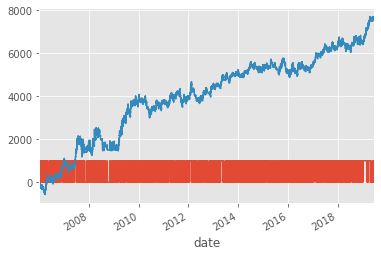

In [7]:
strategy(1300, 780, 1, 1, draw_plot=True)

## KD值策略

In [8]:
filename = '發行量加權股價指數'

twii = data.get(filename)
twii = twii[(twii.index.second == 0)]['台股指數']

kd_strategy_df = pd.DataFrame()

# 原版
# twii_group = twii.groupby([twii.index.year, twii.index.month, twii.index.day])
# twii_group.last()

# 改成新的group的方式
twii_group = twii.groupby(pd.Grouper(freq='D'))

# def kd_strategy(draw_plot=False):
# 當日收盤價
kd_strategy_df['last_price'] = twii_group.last()

# 當日開盤價
kd_strategy_df['open_price'] = twii_group.first()

# 當日最低價
kd_strategy_df['min_price'] = twii_group.min()

# 當日最高價
kd_strategy_df['max_price'] = twii_group.max()

kd_strategy_df = kd_strategy_df.dropna(how='all',axis=0)

# 最近9日的最低價  
kd_strategy_df['min_price_nine'] = kd_strategy_df['min_price'].rolling(9).min()

# 最近9日的最高價
kd_strategy_df['max_price_nine'] = kd_strategy_df['max_price'].rolling(9).max()

# RSV值
kd_strategy_df['rsv'] = (kd_strategy_df['last_price'] - kd_strategy_df['min_price_nine']) / (kd_strategy_df['max_price_nine'] - kd_strategy_df['min_price_nine']) * 100
# rsv = (last_price - min_price_nine_day) / (max_price_nine_day - min_price_nine_day) * 100

k_value = pd.Series(0.0, index=kd_strategy_df['rsv'].index)
d_value = pd.Series(0.0, index=kd_strategy_df['rsv'].index)

#計算今天的K, D值
def calculate(k, d, rsv):
    # print(k, d, rsv)
    # today_k = 2/3 * k + 1/3 * rsa
    # today_d = 2/3 * d + 1/3 * today_k

    today_k = (2 * k / 3) + (1 * rsv / 3)
    today_d = (2 * d / 3) + (1 * today_k / 3)

    # print(today_k, today_d)

    return today_k, today_d

# 前一天的ＫＤ值
k_value[8] = 50.0
d_value[8] = 50.0

for i in range(8, len(kd_strategy_df['rsv']) - 1):
    index = kd_strategy_df['rsv'].index[i]
    next_index = kd_strategy_df['rsv'].index[i + 1]

    # print('i: ', i)
    # print('index: ', index)
    # print('next_index: ', next_index)

    # print('test1: ', k_value[index], d_value[index], rsv[index])

    k_data, d_data = calculate(k_value[index], d_value[index], kd_strategy_df['rsv'][next_index])

    # print('test2: ', k_data, d_data)

    k_value[next_index] = k_data
    d_value[next_index] = d_data

kd_strategy_df['k_value'] = k_value
kd_strategy_df['d_value'] = d_value

kd_strategy_df

,last_price,open_price,min_price,max_price,min_price_nine,max_price_nine,rsv,k_value,d_value
date,,,,,,,,,
2006-01-02,6462.06,6548.34,6424.03,6548.34,NaN,NaN,NaN,0.000000,0.000000
2006-01-03,6591.77,6462.06,6457.09,6591.77,NaN,NaN,NaN,0.000000,0.000000
2006-01-04,6616.44,6591.77,6579.66,6670.96,NaN,NaN,NaN,0.000000,0.000000
2006-01-05,6709.87,6616.44,6616.44,6717.12,NaN,NaN,NaN,0.000000,0.000000
2006-01-06,6694.82,6709.87,6676.65,6761.01,NaN,NaN,NaN,0.000000,0.000000
2006-01-09,6742.39,6694.82,6694.82,6763.86,NaN,NaN,NaN,0.000000,0.000000
2006-01-10,6707.40,6742.39,6678.84,6751.56,NaN,NaN,NaN,0.000000,0.000000
2006-01-11,6735.89,6707.40,6650.61,6741.92,NaN,NaN,NaN,0.000000,0.000000
2006-01-12,6725.61,6735.89,6725.57,6797.20,6424.03,6797.20,80.815714,50.000000,50.000000


## 賣出買入策略

In [11]:
# 黃金交叉 ==> 建議買入 => 當KD指標的K值由下往上突破D值，建議買進、做多 && KD>80=高檔超買，KD<20=低檔超賣
# gold_cross = (k_value.shift(-1) < d_value.shift(-1)) & (k_value > d_value)
# gold_cross.plot()

# death_cross = (k_value.shift(-1) > d_value.shift(-1)) & (k_value < d_value)
# death_cross.plot()
    # buy = (bias < lb)
    # # print(buy)
    # sell = (bias > ub)
    # # print(sell)
    #

#     hold = pd.Series(0, index=death_cross.index)

#     hold[gold_cross] = 0
#     hold[death_cross] = 1
#     hold = hold.ffill()
#     # print(hold)

#     twii_day = twii.groupby([twii.index.year, twii.index.month, twii.index.day])
#     print(twii_day)

    # ret = twii_day.shift(-1) - twii_day
    # print(ret)
    #
    # ret[hold == 0] = 0
    # print(ret)
    # creturn = ret.cumsum()

    #
    # # returns = twii.shift(-2) - twii.shift(-1)
    # #
    # # returns[hold == 0] = 0
    # # returns -= hold.diff().abs() * 3
    # #
    # # creturn = returns.cumsum()
    #
    # if draw_plot:
    #     # (hold * 1000).plot()
    #     creturn.plot()
    #     plt.show()
    #
    # return creturn.dropna()[-1]


# kd_strategy(draw_plot=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [10]:
#阿雞的Code
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
files = ['開盤價', '收盤價', '最高價' ,'最低價', '成交筆數']

stock_id = '2330'
df = pd.DataFrame()

for idx, filename in enumerate(files):
    print(filename)
    df_temp = pd.read_pickle(f"./history/items/price/{filename}.pkl")
    s = df_temp[stock_id]
    df[columns[idx]] = s
    df[columns[idx]].fillna(method='ffill', inplace=True)

df['Name'] = stock_id
df['Date'] = df.index
    
K,D = talib.STOCH(high = np.array(df['Low']), # 最低價
                low = np.array(df['High']),  # 最高價
                close = np.array(df['Close']), # 收盤價
                fastk_period=9,
                slowk_period=3,
                slowk_matype=0,
                slowd_period=3,
                slowd_matype=0)
df['K'] = K
df['D'] = D
df.tail()

開盤價
收盤價
最高價
最低價
成交筆數


,Open,High,Low,Close,Volume,Name,Date,K,D
date,,,,,,,,,
2019-06-24,241.0,241.0,242.0,240.0,17780.0,2330,2019-06-24,61.401557,54.949944
2019-06-25,241.0,238.5,241.5,237.0,11130.0,2330,2019-06-25,51.612903,59.213941
2019-06-26,235.0,234.5,236.5,234.0,13535.0,2330,2019-06-26,25.806452,46.273637
2019-06-27,236.0,240.5,241.5,236.0,14983.0,2330,2019-06-27,17.204301,31.541219
2019-06-28,241.5,239.0,241.5,238.0,8987.0,2330,2019-06-28,16.935484,19.982079
